In [85]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


#  Cyclonic Storm Data (North Atlantic Hurricanes)

Data is sourced from the [United States EPA](https://www.epa.gov/climate-indicators/climate-change-indicators-tropical-cyclone-activity#tab-4).

## Number of Hurricanes in the North Atlantic, 1878–2020




In [4]:
hurricanes_df = pd.read_csv('epa_hurricanes_in_north_atlantic.csv')
hurricanes_df.head()

,Year,Total hurricanes (adjusted),Total hurricanes (unadjusted),Hurricanes reaching the United States
0,1880,9.63874,6.6,2.6
1,1881,8.24872,5.2,2.4
2,1882,7.82772,4.8,1.8
3,1883,7.23736,4.2,1.2
4,1884,8.38944,5.4,2.2


## Accumulated Cyclone Energy Index (ACE), 1950–2020

Accumulated Cyclone Energy (ACE) Index, account sfor cyclone strength, duration, and frequency, from 1950 through 2020.

In [5]:
ace_df = pd.read_csv('epa_north_atlantic_tropical_cyclone_activity_accumulated_cyclone_energy_index.csv')
ace_df.head()

,Year,Adjusted ACE Index (as % of 1981-2010 median)
0,1950,228.108108
1,1951,136.216216
2,1952,74.594595
3,1953,107.027027
4,1954,120.000000


## Power Dissipation Index, 1950–2019

Power Dissipation Index (PDI), accounts for cyclone strength, duration, and frequency.


In [6]:
pdi_df = pd.read_csv('epa_north_atlantic_tropical_cyclone_power_dissipation_index.csv')
pdi_df.head()

,Year,Smoothed SST (F),Smoothed Power Dissipation Index (10^11 m^3/s^2)
0,1951,82.10660,2.6784
1,1952,82.21388,2.2490
2,1953,82.15412,2.1383
3,1954,82.01354,2.3011
4,1955,81.94550,2.2156


In [8]:
merged_df = hurricanes_df.merge(ace_df, on='Year', how='inner').merge(pdi_df, on='Year', how='inner')
merged_df.head()

,Year,Total hurricanes (adjusted),Total hurricanes (unadjusted),Hurricanes reaching the United States,Adjusted ACE Index (as % of 1981-2010 median),Smoothed SST (F),Smoothed Power Dissipation Index (10^11 m^3/s^2)
0,1951,8.34138,7.6,2.0,136.216216,82.10660,2.6784
1,1952,8.30516,7.6,2.0,74.594595,82.21388,2.2490
2,1953,7.86162,7.2,1.8,107.027027,82.15412,2.1383
3,1954,7.03774,6.4,2.0,120.000000,82.01354,2.3011
4,1955,6.60828,6.0,2.0,170.810811,81.94550,2.2156


In [27]:
merged_df['Total hurricanes (unadjusted, 5Y Moving Average)'] = merged_df['Total hurricanes (unadjusted)'].rolling(window=5).mean()
merged_df.head()

,Year,Total hurricanes (adjusted),Total hurricanes (unadjusted),Hurricanes reaching the United States,Adjusted ACE Index (as % of 1981-2010 median),Smoothed SST (F),Smoothed Power Dissipation Index (10^11 m^3/s^2),Avg,"Total hurricanes (unadjusted, 5Y moving Average)","Total hurricanes (unadjusted, 5Y Moving Average)"
0,1951,8.34138,7.6,2.0,136.216216,82.10660,2.6784,NaN,NaN,NaN
1,1952,8.30516,7.6,2.0,74.594595,82.21388,2.2490,NaN,NaN,NaN
2,1953,7.86162,7.2,1.8,107.027027,82.15412,2.1383,NaN,NaN,NaN
3,1954,7.03774,6.4,2.0,120.000000,82.01354,2.3011,NaN,NaN,NaN
4,1955,6.60828,6.0,2.0,170.810811,81.94550,2.2156,6.96,6.96,6.96


In [34]:
temp_df = pd.read_csv('temp_land_ocean_data_cleaned.csv')
temp_df.head()

,Year,Anomaly
0,1991,0.43
1,1992,0.32
2,1993,0.24
3,1994,0.25
4,1995,0.47


In [35]:
temp_df['CumAnomaly'] = temp_df['Anomaly'].cumsum()
temp_df.head()

,Year,Anomaly,CumAnomaly
0,1991,0.43,0.43
1,1992,0.32,0.75
2,1993,0.24,0.99
3,1994,0.25,1.24
4,1995,0.47,1.71


In [36]:
merged_df = merged_df.merge(temp_df, on='Year', how='inner')
merged_df.head()

,Year,Total hurricanes (adjusted),Total hurricanes (unadjusted),Hurricanes reaching the United States,Adjusted ACE Index (as % of 1981-2010 median),Smoothed SST (F),Smoothed Power Dissipation Index (10^11 m^3/s^2),Avg,"Total hurricanes (unadjusted, 5Y moving Average)","Total hurricanes (unadjusted, 5Y Moving Average)",Anomaly,CumAnomaly
0,1991,5.4,5.4,1.2,38.918919,81.82904,1.6827,5.40,5.40,5.40,0.43,0.43
1,1992,4.6,4.6,0.6,82.162162,81.67334,1.3428,5.28,5.28,5.28,0.32,0.75
2,1993,5.2,5.2,1.0,42.162162,81.73400,1.5155,5.24,5.24,5.24,0.24,0.99
3,1994,6.2,6.2,1.2,34.594595,81.95414,2.4098,5.40,5.40,5.40,0.25,1.24
4,1995,6.0,6.0,1.2,246.486487,82.17032,3.3501,5.48,5.48,5.48,0.47,1.71


# Exploratory Data Analysis

Number of Hurricanes in the North Atlantic, 1878–2020

In [40]:
px.line(merged_df, x='Year', y=['Total hurricanes (unadjusted)', 'Total hurricanes (unadjusted, 5Y Moving Average)', 'Hurricanes reaching the United States'], 
        labels={'Year':'Year', 'value':'Number of Hurricanes'}, 
        title='Number of Hurricanes in North Atlantic (1951-2020)')   

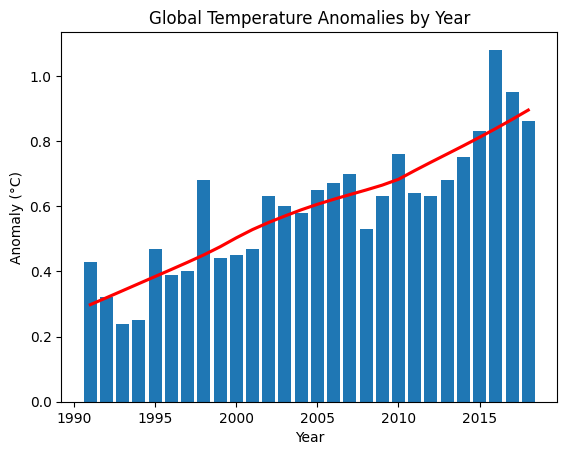

In [60]:
x = merged_df['Year']
y = merged_df['Anomaly']

plt.bar(x, y)
sns.regplot(x=x, y=y, lowess=True, scatter=False, color='red')
plt.xlabel('Year')
plt.ylabel('Anomaly (°C)')
plt.title('Global Temperature Anomalies by Year')
plt.show()

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Line(x=pdi_df['Year'], 
                      y=pdi_df['Smoothed Power Dissipation Index (10^11 m^3/s^2)'],
                      name="Power Dissipation Index"
                      ),
                      secondary_y=False
)

fig.add_trace(go.Line(x=pdi_df['Year'], 
                      y=pdi_df['Smoothed SST (F)'],
                      name="Sea Surface Temperature",
                      line=dict(color='firebrick', width=2, dash='dot')
                      ),
                      secondary_y=True
)

fig.update_layout(title_text="Power Dissipation Index and Sea Surface Temperature (1950-2020)")
fig.update_yaxes(title_text="Power Dissipation Index", secondary_y=False)
fig.update_yaxes(title_text="Sea Surface Temperature (<span>&#8457;</span>)", secondary_y=True)

fig.show()

/usr/local/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [83]:
fig = px.bar(ace_df, x='Year', y=['Adjusted ACE Index (as % of 1981-2010 median)'], 
        labels={'Year':'Year', 'value':'Acculumated Cyclone Energy Index'}, 
        title='Accumulated Cyclone Energy Index (1951-2020)') 
# fig.add_hline(y=60, line_color='red', line_dash='dash', annotation_text='Near<br>Normal', annotation_position='right')
fig.add_hrect(y0=60, y1=130, line_width=0, fillcolor="green", opacity=0.3, annotation_text='Normal', annotation_position='right')

fig.show()